# Análise de Casos de Covid no Brasil

## Instalando e Importando Bibliotecas

In [1]:
!pip install pandas
!pip install sklearn
!pip install matplotlib

In [2]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
from datetime import datetime

## Importando os Datasets

In [3]:
#Importando os datasets

#df_ci_coo = brazil_cities_coordinates
#df_co_ci = brazil_covid19_cities
#df_co_ma = brazil_covid19_macro
#df_co_old = brazil_covid19_old
#df_co_re = brazil_covid19_region
#df_po_2019 = brazil_population_2019

df_ci_coo = pd.read_csv("./dados/brazil_cities_coordinates.csv")
df_co_ci = pd.read_csv("./dados/brazil_covid19_cities.csv")
df_co_ma = pd.read_csv("./dados/brazil_covid19_macro.csv")
df_co_old = pd.read_csv("./dados/brazil_covid19_old.csv")
df_co_re = pd.read_csv("./dados/brazil_covid19_region.csv")
df_po_2019 = pd.read_csv("./dados/brazil_population_2019.csv", on_bad_lines='skip')

## Trabalhando com o DataSet : Covid19 Macro no Brasil 

In [4]:
df_co_ma.tail(10)

,date,country,week,cases,deaths,recovered,monitoring
446,2021-05-14,Brasil,19,15519525.0,432628,14028355.0,1058542.0
447,2021-05-15,Brasil,19,15586534.0,434715,14062396.0,1089423.0
448,2021-05-16,Brasil,20,15627475.0,435751,14097287.0,1094437.0
449,2021-05-17,Brasil,20,15657391.0,436537,14152433.0,1068421.0
450,2021-05-18,Brasil,20,15732836.0,439050,14247609.0,1046177.0
451,2021-05-19,Brasil,20,15812055.0,441691,14330118.0,1040246.0
452,2021-05-20,Brasil,20,15894094.0,444094,14385962.0,1064038.0
453,2021-05-21,Brasil,20,15970949.0,446309,14422209.0,1102431.0
454,2021-05-22,Brasil,20,16047439.0,448208,14462432.0,1136799.0
455,2021-05-23,Brasil,21,16083258.0,449068,14492167.0,1142023.0


In [5]:
#Renomeando as colunas

df_co_ma_troca = {
    "date" : "data",
    "week" : "semana",
    "country" : "pais",
    "cases" : "casos",
    "deaths" : "mortes",
    "recovered" : "recuperados",
    "monitoring" : "monitorados"
}

df_co_ma = df_co_ma.rename(columns=df_co_ma_troca)
df_co_ma.head()

,data,pais,semana,casos,mortes,recuperados,monitorados
0,2020-02-25,Brasil,9,0.0,0,NaN,NaN
1,2020-02-26,Brasil,9,1.0,0,NaN,NaN
2,2020-02-27,Brasil,9,1.0,0,NaN,NaN
3,2020-02-28,Brasil,9,1.0,0,NaN,NaN
4,2020-02-29,Brasil,9,2.0,0,NaN,NaN


In [6]:
#Deletando a coluna pais, pois a mesma se refe apenas ao Brasil

df_co_ma = df_co_ma.drop(columns = ["pais"], axis = 1)
df_co_ma.head(25)

,data,semana,casos,mortes,recuperados,monitorados
0,2020-02-25,9,0.0,0,NaN,NaN
1,2020-02-26,9,1.0,0,NaN,NaN
2,2020-02-27,9,1.0,0,NaN,NaN
3,2020-02-28,9,1.0,0,NaN,NaN
4,2020-02-29,9,2.0,0,NaN,NaN
5,2020-03-01,10,2.0,0,NaN,NaN
6,2020-03-02,10,2.0,0,NaN,NaN
7,2020-03-03,10,2.0,0,NaN,NaN
8,2020-03-04,10,3.0,0,NaN,NaN
9,2020-03-05,10,7.0,0,NaN,NaN


In [7]:
print(type(df_co_ma.data[0]))

<class 'str'>


In [8]:
#Alterando a coluna data que está no formato string para o timestamp

df_co_ma['data'] = pd.to_datetime(df_co_ma['data'], format='%Y-%m-%d')
df_co_ma.data[1].year

2020

In [9]:
#Com a funao dt(datetime) seleciono apenas o que necessito nesse caso foi o year(ano)

df_co_ma["data"].dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
451    2021
452    2021
453    2021
454    2021
455    2021
Name: data, Length: 456, dtype: int64

In [10]:
#Crio a coluna ano e visualizo o dataset

df_co_ma["ano"] = df_co_ma["data"].dt.year
df_co_ma.head()

,data,semana,casos,mortes,recuperados,monitorados,ano
0,2020-02-25,9,0.0,0,NaN,NaN,2020
1,2020-02-26,9,1.0,0,NaN,NaN,2020
2,2020-02-27,9,1.0,0,NaN,NaN,2020
3,2020-02-28,9,1.0,0,NaN,NaN,2020
4,2020-02-29,9,2.0,0,NaN,NaN,2020


In [11]:
df_2020 = df_co_ma.ano == 2020
df_2021 = df_co_ma.ano == 2021

In [12]:
df_2020
df_co_ma[df_2020]
df_co_ma_2020 = df_co_ma[df_2020]
df_co_ma_2020.head()

,data,semana,casos,mortes,recuperados,monitorados,ano
0,2020-02-25,9,0.0,0,NaN,NaN,2020
1,2020-02-26,9,1.0,0,NaN,NaN,2020
2,2020-02-27,9,1.0,0,NaN,NaN,2020
3,2020-02-28,9,1.0,0,NaN,NaN,2020
4,2020-02-29,9,2.0,0,NaN,NaN,2020


In [13]:
df_2021
df_co_ma[df_2021]
df_co_ma_2021 = df_co_ma[df_2021]
df_co_ma_2021.head()

,data,semana,casos,mortes,recuperados,monitorados,ano
312,2021-01-01,53,7700578.0,195411,6756284.0,748883.0,2021
313,2021-01-02,53,7716405.0,195725,6769420.0,751260.0,2021
314,2021-01-03,1,7733746.0,196018,6813008.0,724720.0,2021
315,2021-01-04,1,7753752.0,196561,6875230.0,681961.0,2021
316,2021-01-05,1,7810400.0,197732,6963407.0,649261.0,2021


In [14]:
#Criando o agrupamento das semanas e anos

df_sem_2020 = df_co_ma_2020.groupby(by=['semana']).sum()
df_sem_2021 = df_co_ma_2021.groupby(by=['semana']).sum()


In [15]:
df_sem_2020 = df_sem_2020.drop(columns = ["ano"])
df_sem_2020.head()

,casos,mortes,recuperados,monitorados
semana,,,,
9,5.0,0,0.0,0.0
10,48.0,0,0.0,0.0
11,432.0,0,0.0,0.0
12,3806.0,40,0.0,0.0
13,18306.0,445,0.0,0.0


In [16]:
df_sem_2021 = df_sem_2021.drop(columns = ["ano"])
df_sem_2021.head()

,casos,mortes,recuperados,monitorados
semana,,,,
1,55223107.0,1393874,49043591.0,4785642.0
2,66118956.0,1647935,58332846.0,6078550.0
3,60479524.0,1490303,52751119.0,6238102.0
4,63000377.0,1541898,54922047.0,6536432.0
5,65398144.0,1593316,57485040.0,6319788.0


In [17]:
letalidade_2020 = df_sem_2020.mortes / df_sem_2020.casos

In [18]:
letalidade_2020

semana
9     0.000000
10    0.000000
11    0.000000
12    0.010510
13    0.024309
14    0.037569
15    0.050670
16    0.061190
17    0.065892
18    0.069237
19    0.068310
20    0.068523
21    0.064902
22    0.061065
23    0.055420
24    0.051387
25    0.048520
26    0.045113
27    0.041812
28    0.039661
29    0.038307
30    0.037086
31    0.035273
32    0.033967
33    0.032871
34    0.032145
35    0.031616
36    0.030916
37    0.030553
38    0.030305
39    0.030045
40    0.029873
41    0.029662
42    0.029497
43    0.029302
44    0.028994
45    0.028807
46    0.028485
47    0.028129
48    0.027689
49    0.027115
50    0.026581
51    0.026084
52    0.025662
53    0.025476
dtype: float64

In [19]:
letalidade_2021 = df_sem_2021.mortes / df_sem_2021.casos

In [20]:
letalidade_2021

semana
1     0.025241
2     0.024924
3     0.024641
4     0.024474
5     0.024363
6     0.024317
7     0.024283
8     0.024211
9     0.024171
10    0.024159
11    0.024358
12    0.024646
13    0.025207
14    0.025836
15    0.026463
16    0.026994
17    0.027421
18    0.027733
19    0.027858
20    0.027917
21    0.027921
53    0.025370
dtype: float64

In [21]:
from matplotlib import pyplot as plt

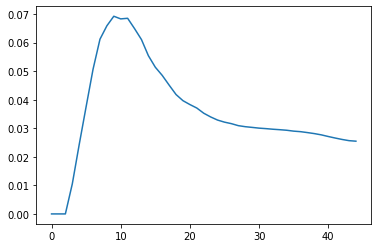

In [22]:
plt.plot(letalidade_2020.values)

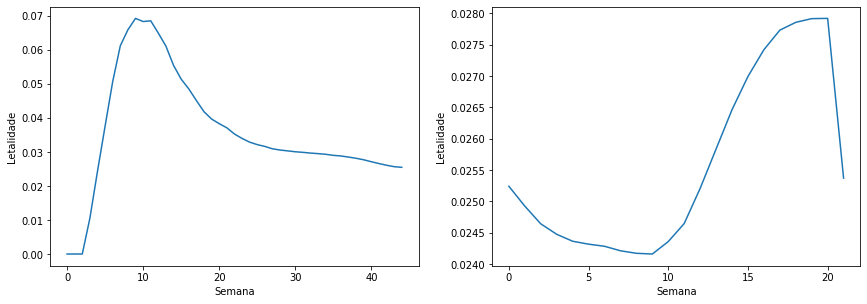

In [64]:
figs, axis = plt.subplots(1,2)

axis[0].plot(letalidade_2020.values)
axis[0].set_xlabel("Semana")
axis[0].set_ylabel("Letalidade")
axis[1].plot(letalidade_2021.values)
axis[1].set_xlabel("Semana")
axis[1].set_ylabel("Letalidade")
plt.subplots_adjust(bottom=0.1, right=2.0, top=1.0)
plt.show()

